In [1]:
import zipfile
import os


In [2]:
# Path to the zip file
zip_file_path = '.\Dataset-zip\PRAICP-1002-TrafSignDetc.zip'

# Path to the dataset folder
dataset_folder = '.\Dataset-org'

# Create the dataset folder if it doesn't exist
os.makedirs(dataset_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_folder)

print(f"Data extracted to {dataset_folder}")

Data extracted to D:\PRAICP-1002-TrafSignDetc\Dataset-org


In [13]:
files_list = os.listdir(r"Dataset-org\Train\5")

# Count the number of files
num_files = len(files_list)
print(num_files)

1860


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
# Define the model architecture with Input layer
from tensorflow.keras.layers import Input

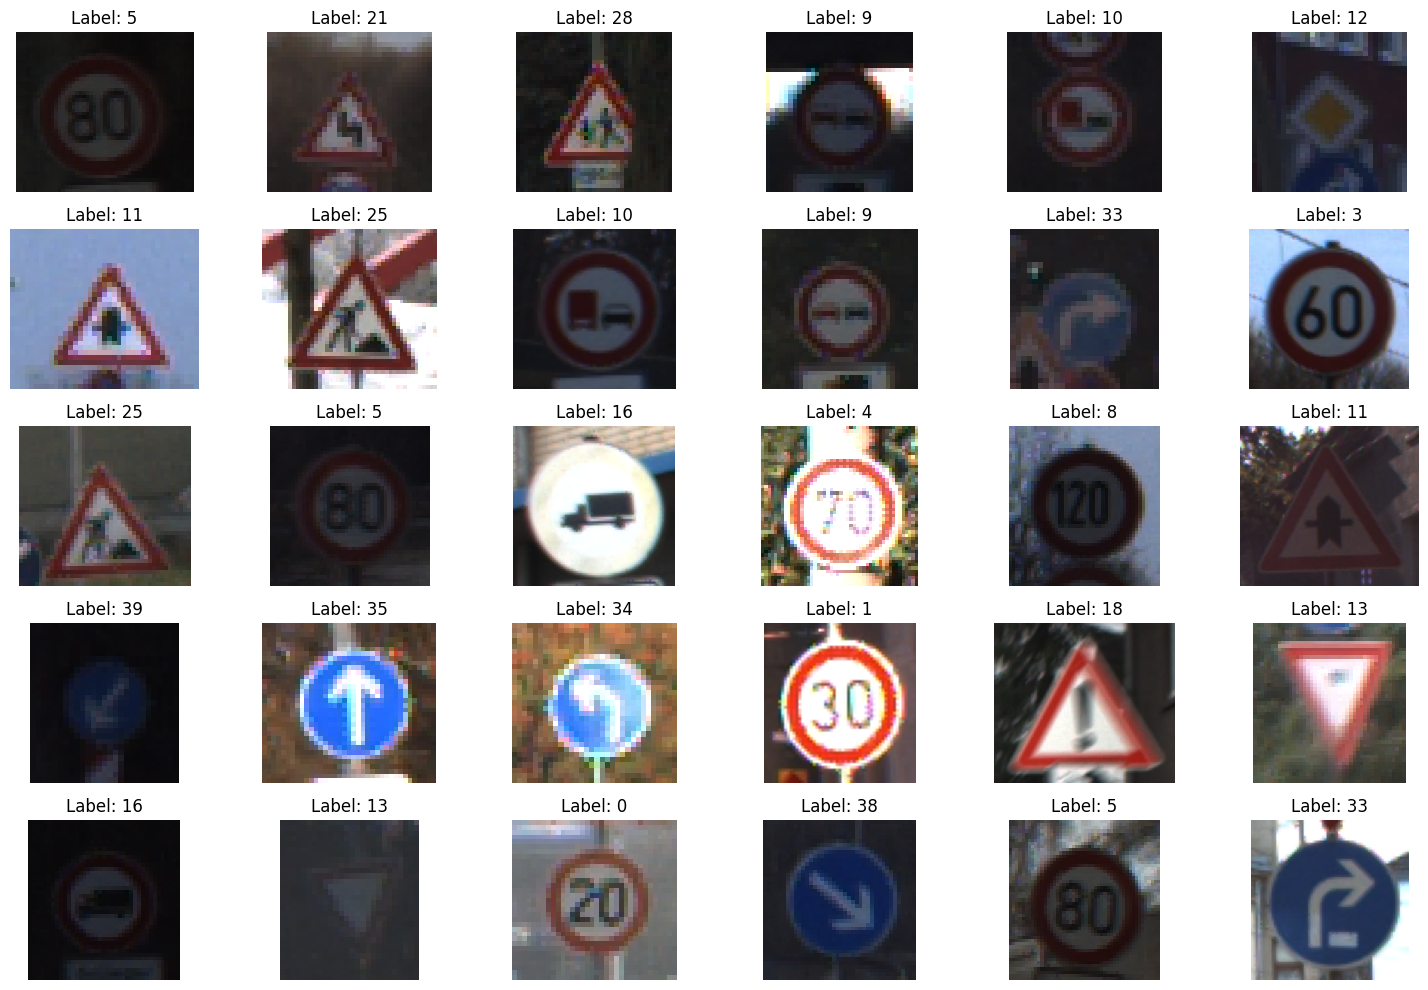

In [3]:
import random
dataset_path = 'Dataset-org/train'  # Adjust this to the correct path

# Get all label folders (0 to 42)
labels = [str(i) for i in range(43)]
image_paths = []

# Gather all images along with their labels
for label in labels:
    folder_path = os.path.join(dataset_path, label)
    if os.path.exists(folder_path):
        images = os.listdir(folder_path)
        for image in images:
            image_paths.append((os.path.join(folder_path, image), label))

# Randomly select 30 images
selected_images = random.sample(image_paths, 30)

# Set up the figure: 5 rows and 6 columns
fig, axs = plt.subplots(5, 6, figsize=(15, 10))
axs = axs.flatten()  # Flatten the 2D axis array

for i, (image_path, label) in enumerate(selected_images):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    # Display the image
    axs[i].imshow(image)
    axs[i].axis('off')  # Turn off axis labels
    axs[i].set_title(f'Label: {label}')  # Set the label as the title

# Remove any extra subplots (if less than 30 images)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Display the plot
plt.tight_layout()
plt.show()

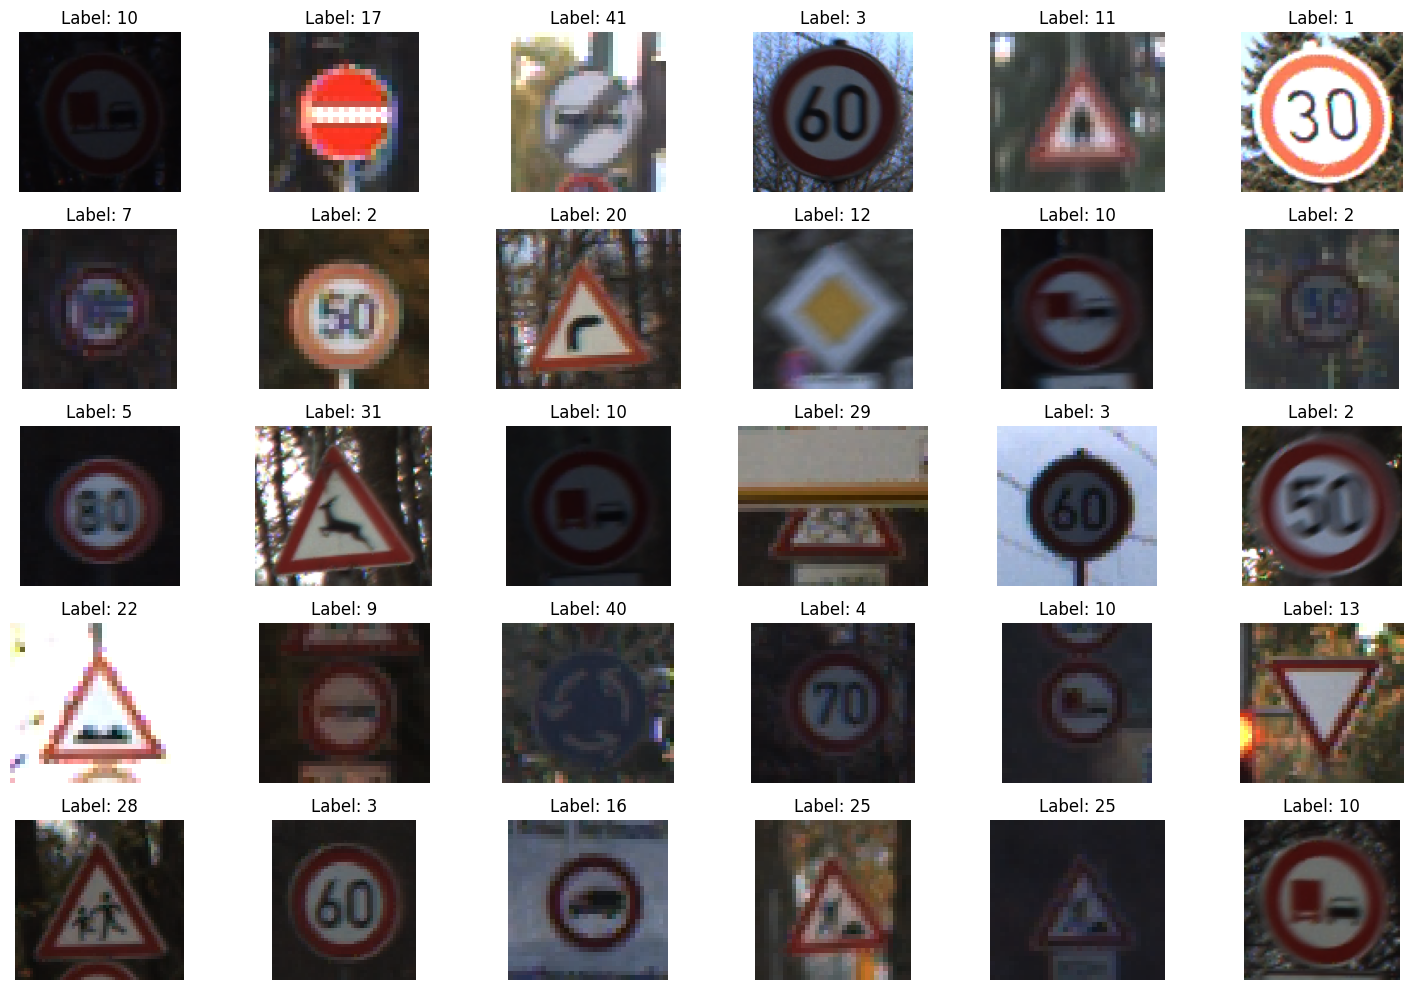

In [4]:
# Randomly select 30 images
selected_images = random.sample(image_paths, 30)

# Set up the figure: 5 rows and 6 columns
fig, axs = plt.subplots(5, 6, figsize=(15, 10))
axs = axs.flatten()  # Flatten the 2D axis array

for i, (image_path, label) in enumerate(selected_images):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    # Display the image
    axs[i].imshow(image)
    axs[i].axis('off')  # Turn off axis labels
    axs[i].set_title(f'Label: {label}')  # Set the label as the title

# Remove any extra subplots (if less than 30 images)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Display the plot
plt.tight_layout()
plt.show()

In [3]:
# Manual data loading function
def load_data(data_dir):
    images = []
    labels = []
    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (32, 32))  # Resize images to 32x32 pixels
            images.append(image)
            labels.append(int(label))  # Convert folder name (label) to integer
    images = np.array(images)
    labels = np.array(labels)
    return train_test_split(images, labels, test_size=0.2, random_state=42)

In [4]:
train_images, test_images, train_labels, test_labels = load_data('Dataset-org\Train')

In [5]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels))

31367
31367
7842
7842


In [6]:
print(type(train_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
print(train_images[0])

[[[29 29 28]
  [28 30 28]
  [33 38 35]
  ...
  [21 23 24]
  [25 27 25]
  [29 33 33]]

 [[38 39 30]
  [26 30 24]
  [30 35 33]
  ...
  [27 29 31]
  [25 28 29]
  [29 34 34]]

 [[33 35 22]
  [26 31 24]
  [29 34 32]
  ...
  [34 37 39]
  [30 33 35]
  [31 34 35]]

 ...

 [[24 22 23]
  [25 22 22]
  [24 23 23]
  ...
  [18 15 16]
  [18 15 16]
  [17 13 13]]

 [[20 18 19]
  [22 18 20]
  [20 18 20]
  ...
  [19 16 17]
  [19 15 17]
  [17 15 15]]

 [[19 17 17]
  [20 18 19]
  [21 18 20]
  ...
  [23 19 19]
  [21 18 20]
  [19 18 19]]]


In [8]:
print(train_labels[0])

7


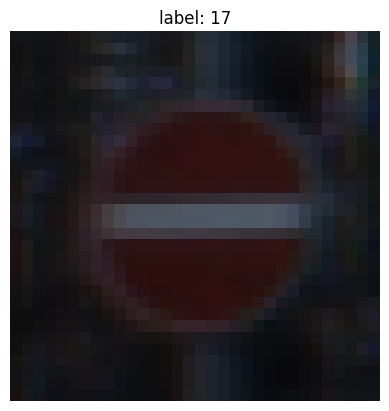

In [9]:
image_rgb = cv2.cvtColor(train_images[13], cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title(f"label: {train_labels[13]}")  # Use plt.title to set the title for the plot
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [12]:
model = Sequential([
    Input(shape=(32, 32, 3)),  # Explicitly define the input shape here
    data_augmentation,         # Apply data augmentation
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')
])

In [13]:
# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,723 (1.20 MB)

 Trainable params: 315,339 (1.20 MB)

 Non-trainable params: 384 (1.50 KB)